In [1]:
import sys
sys.path.insert(0, "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/ChromosomeDetectionChloe_for_exp/utils")

In [2]:
from chromosome_dsb import *

/Users/Espenel/anaconda/envs/chloe/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [5]:
import numpy as np
import javabridge
import bioformats
from skimage.filters import roberts
from sklearn.externals import joblib
import os

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [6]:
path = '/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/data_chloe/cku-exo1_002/'

In [56]:
javabridge.start_vm(class_path=bioformats.JARS)

In [9]:
position, time_point = load_data.stage_position(path)
skelete = load_data.skeleton_coord(position,time_point)

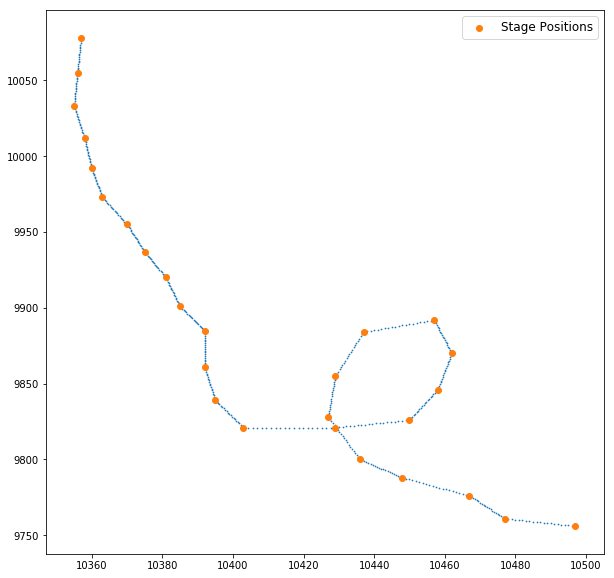

In [13]:
data = np.concatenate((position,time_point[:, np.newaxis]), axis=1)
sort_data = data[np.argsort(data[:,2])]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(skelete[:,0], skelete[:,1], s=0.5)
stage_pos = ax.scatter(sort_data[:,0], sort_data[:,1])
plt.legend([stage_pos], ["Stage Positions"], loc=0,fontsize='large')

In [14]:
# Size kernel for background substraction, should be a little larger than the object of interest
back_sub_ch1 = 5
back_sub_ch2 = 5
back_sub_ch3 = 20
# LOCI detection:
# Smallest object (in pixels) to be detected
smaller = 1
# Largest object to be detected
largest = 5
# Threshold above which to look for
thresh = 80

In [17]:
clf = joblib.load("/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/clf_scaler/clf")
scaler = joblib.load("/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/clf_scaler/scaler")

In [ ]:
batch.batch_analysis(path)